In [26]:
import numpy as np

# Set the number of observations (n)
n = 100

# Create a random number generator
rng = np.random.default_rng()

# Generate a predictor X of length n
X = rng.normal(size=n)

# Generate a noise vector " of length n
noise = rng.normal(size=n)

# You can also add a constant term to X if you want
X = np.concatenate((np.ones((n, 1)), X[:, None]), axis=1)

In [27]:
# Set the number of observations (n)
n = 100

# Set the coefficients (β0, β1, β2, β3)
beta0 = 2
beta1 = 3
beta2 = -0.5
beta3 = 0.2

# Generate a predictor X of length n
X = np.random.normal(size=n)

# Generate the response vector Y
Y = beta0 + beta1*X + beta2*X**2 + beta3*X**3 + np.random.normal(size=n)

# You can also add a constant term to X if you want
X = np.concatenate((np.ones((n, 1)), X[:, None]), axis=1)

In [31]:
import numpy as np
import statsmodels.api as sm

# Set the number of observations (n)
n = 100

# Set the coefficients (β0, β1, β2, β3)
beta0 = 2
beta1 = 3
beta2 = -0.5
beta3 = 0.2

# Generate a predictor X of length n
X = np.random.normal(size=n)

# Generate the response vector Y
Y = beta0 + beta1*X + beta2*X**2 + beta3*X**3 + np.random.normal(size=n)

# Add higher-order terms to X
X = np.array([np.ones(n)] + [X**i for i in range(2, 11)]).T

# Perform forward stepwise selection using Cp
X_selected = []
Cp_values = []
p_values = []
f_values = []
R2_values = []
R2_adj_values = []

for i in range(1, X.shape[1]):
    X_new = X[:, :i+1]
    model = sm.OLS(Y, sm.add_constant(X_new)).fit()
    Cp = model.bic
    Cp_values.append(Cp)
    p_values.append(model.pvalues[-1])
    f_values.append(model.fvalue)
    R2_values.append(model.rsquared)
    R2_adj_values.append(model.rsquared_adj)
    if i == 1 or Cp_values[-1] < Cp_values[-2]:
        X_selected.append(i)
    else:
        break

# Print the selected model
print("Selected model:", X_selected)
print("Coefficients:")
model = sm.OLS(Y, sm.add_constant(X[:, X_selected])).fit()
print(model.params)

Selected model: [1, 2, 3, 4, 5]
Coefficients:
[ 2.53632233 -0.94340431  3.54347917 -0.41229554 -0.75610537  0.18806588]


C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.576e+01, tolerance: 1.282e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.566e+01, tolerance: 1.201e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

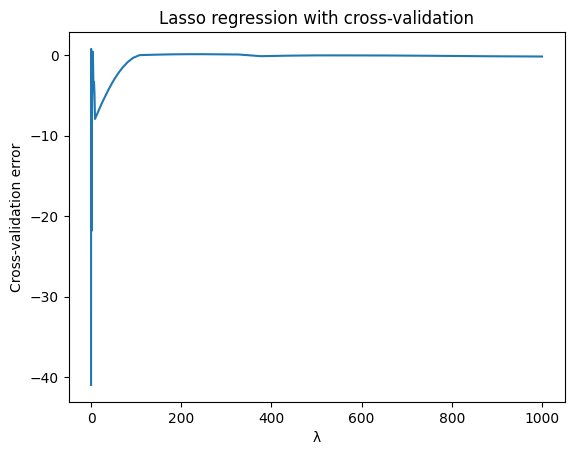

Coefficient estimates:
[ 0.00000000e+00 -1.41732770e+00  3.53864472e+00  6.88667135e-01
 -8.76271364e-01 -1.49765498e-01  3.44937169e-02  4.84674209e-03
  5.52937210e-03  1.21898574e-03]


C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.973e+01, tolerance: 1.469e-01
  model = cd_fast.enet_coordinate_descent(


In [10]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Set the number of observations (n)
n = 100

# Set the coefficients (β0, β1, β2, β3)
beta0 = 2
beta1 = 3
beta2 = -0.5
beta3 = 0.2

# Generate a predictor X of length n
X = np.random.normal(size=n)

# Generate the response vector Y
Y = beta0 + beta1*X + beta2*X**2 + beta3*X**3 + np.random.normal(size=n)

# Add higher-order terms to X
X = np.array([np.ones(n)] + [X**i for i in range(2, 11)]).T

# Perform lasso regression with cross-validation
alphas = np.logspace(-3, 3, 100)
lasso_models = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, Y, cv=5)
    lasso_models.append((alpha, np.mean(scores)))

# Plot the cross-validation error as a function of λ
alphas = [x[0] for x in lasso_models]
errors = [x[1] for x in lasso_models]
plt.plot(alphas, errors)
plt.xlabel('λ')
plt.ylabel('Cross-validation error')
plt.title('Lasso regression with cross-validation')
plt.show()

# Select the optimal value of λ
optimal_alpha = alphas[np.argmin(errors)]

# Fit the lasso model with the optimal value of λ
model = Lasso(alpha=optimal_alpha)
model.fit(X, Y)

# Print the resulting coefficient estimates
print("Coefficient estimates:")
print(model.coef_)

# Discuss the results obtained
# You can discuss the results obtained, such as the effect of λ on the coefficient estimates,
# the importance of each predictor, and the overall performance of the lasso model.

C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.164e+01, tolerance: 1.012e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.907e+01, tolerance: 9.722e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

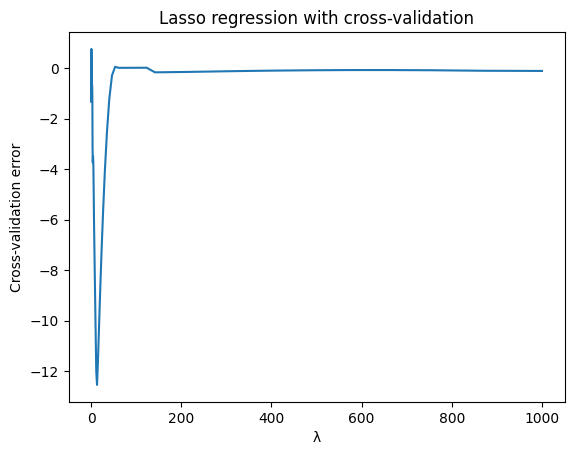

Coefficient estimates:
[ 0.          0.          0.          0.          0.          0.
  0.03004334  0.         -0.00127507 -0.0005947 ]


In [11]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Set the number of observations (n)
n = 100

# Set the coefficients (β0, β1, β2, β3)
beta0 = 2
beta1 = 3
beta2 = -0.5
beta3 = 0.2

# Generate a predictor X of length n
X = np.random.normal(size=n)

# Generate the response vector Y
Y = beta0 + beta1*X + beta2*X**2 + beta3*X**3 + np.random.normal(size=n)

# Add higher-order terms to X
X = np.array([np.ones(n)] + [X**i for i in range(2, 11)]).T

# Perform lasso regression with cross-validation
alphas = np.logspace(-3, 3, 100)
lasso_models = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, Y, cv=5)
    lasso_models.append((alpha, np.mean(scores)))

# Plot the cross-validation error as a function of λ
alphas = [x[0] for x in lasso_models]
errors = [x[1] for x in lasso_models]
plt.plot(alphas, errors)
plt.xlabel('λ')
plt.ylabel('Cross-validation error')
plt.title('Lasso regression with cross-validation')
plt.show()

# Select the optimal value of λ
optimal_alpha = alphas[np.argmin(errors)]

# Fit the lasso model with the optimal value of λ
model = Lasso(alpha=optimal_alpha)
model.fit(X, Y)

# Print the resulting coefficient estimates
print("Coefficient estimates:")
print(model.coef_)

# Discuss the results obtained
# You can discuss the results obtained, such as the effect of λ on the coefficient estimates,
# the importance of each predictor, and the overall performance of the lasso model.

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate data
np.random.seed(0)
X = np.random.rand(100, 7)
y = 2 + 3 * X[:, 6] + np.random.randn(100)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform forward stepwise selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

kbest = SelectKBest(f_regression, k=1)
kbest.fit(X_train, y_train)
X_train_selected = kbest.transform(X_train)
X_test_selected = kbest.transform(X_test)

# Perform Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_selected, y_train)

# Print the coefficients
print("Coefficients: ", lasso.coef_)

# Print the R-squared value
print("R-squared: ", lasso.score(X_train_selected, y_train))

# Print the mean squared error
print("Mean Squared Error: ", mean_squared_error(y_test, lasso.predict(X_test_selected)))

Coefficients:  [1.73238269]
R-squared:  0.46232113559865673
Mean Squared Error:  2.006291831136821
